# EDA and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
import os

C:\Users\Srujan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('diabetes_data.csv')
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

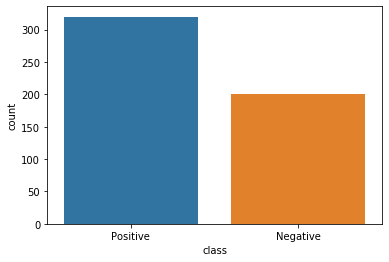

In [4]:
sns.countplot(x='class',data=data)

In [5]:
df1=pd.get_dummies(data.drop('Age',axis=1),drop_first=True)

In [6]:
df1.head(10)

,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [7]:
s1=data[['Age']]
frames=[s1,df1]

In [8]:
df=pd.concat(frames,axis=1)

In [9]:
df.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [10]:
df.shape

(520, 17)

In [11]:
data.shape

(520, 17)

In [12]:
import dtale

In [13]:
dtale.show(df)

2021-01-19 20:01:06,769 - INFO     - NumExpr defaulting to 4 threads.


# MODEL BUILING

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [89]:
x,y=df.drop('class_Positive',axis=1),df['class_Positive']

In [90]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 7)

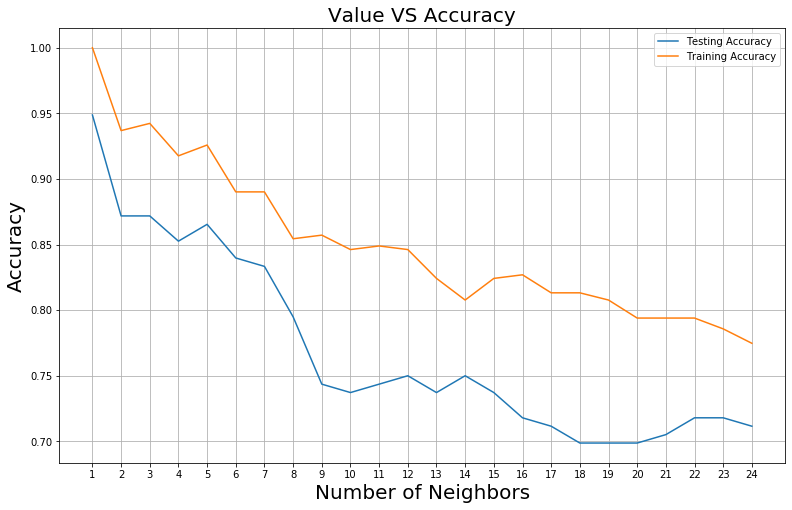

Best accuracy is 0.9487179487179487 with K = 1


In [16]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
# x,y = df.loc[:,data.columns != 'class_Positive'], df.loc[:,'class_Positive']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.9487179487179487


# DecisionTree

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:


# #sub model1: where target variable is 'Combined_pos'

param ={'dt__max_depth':np.arange(1,100)}

# preprocessor.fit_transform(df)
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('dt', DecisionTreeClassifier()),
])
grid = GridSearchCV(pipeline, param_grid= param,cv=3,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
grid.best_params_
# grid.get_params().keys()

{'dt__max_depth': 21}

In [76]:
dt=DecisionTreeClassifier(max_depth=51,random_state=0)

In [77]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=51,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [71]:
# accuracy
dt.score(x_test,y_test)

0.9743589743589743

In [73]:
predictions_dt = dt.predict(x_test)

In [74]:
print(confusion_matrix(y_test, prediction))

[[61  2]
 [ 6 87]]


In [75]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        63
           1       0.98      0.94      0.96        93

    accuracy                           0.95       156
   macro avg       0.94      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156



# RandomForestClassifier

In [54]:

param ={'ab__n_estimators':np.arange(1,100)}

# preprocessor.fit_transform(df)
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('ab', RandomForestClassifier()),
])
kf=model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
grid = GridSearchCV(pipeline, param_grid= param,cv=kf,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
grid.best_params_

{'ab__n_estimators': 40}

In [55]:
clf = RandomForestClassifier(max_depth=40, random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
# accuracy
clf.score(x_test,y_test)

0.9551282051282052

# GradientBoostingClassifier

In [58]:

param ={'grad_boost_pos__n_estimators':np.arange(1,500)}
pipeline = Pipeline([
                    #  ('preprocessor', preprocessor),
                   ('sc',StandardScaler()),
                   ('grad_boost_pos', GradientBoostingClassifier()),
])
grid = GridSearchCV(pipeline, param_grid= param,cv=3,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
grid.best_params_

{'grad_boost_pos__n_estimators': 38}

In [69]:
#Summarize all tuned models
GBoost=GradientBoostingClassifier(n_estimators=38,random_state=0)

In [70]:
GBoost.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=38,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
# accuracy
GBoost.score(x_test,y_test)

0.9358974358974359

# Conclusion

DECISION TREE gave best results for our data 
which means with decision tree model we can easily predict the risk of diabeties for that patient with al given symptoms known
with 97% accuracy

# pickling

In [36]:
# import pickle
# pickle_out=open('dt.pkl','wb')
# pickle.dump(dt,pickle_out)
# pickle_out.close()

In [78]:
dt.predict([[22,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1]])

array([1], dtype=uint8)